In [1]:
# Import Depedencies 
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import requests
import gmaps
from scipy.stats import linregress

# Getting API key
from configs import gkey

In [2]:
# Import cleaned csv
csvfile1 = "Resources/Cleaned_Vaccine_Case_Data.csv"

# Add as DataFrame
main_df = pd.read_csv(csvfile1)
main_df = main_df.drop(columns="Unnamed: 0")
main_df

,POSTCODE,Total Population,Total Case Count,% Cases Over Age 18,% Cases Over Age 65,Total Cases Category,Total Vaccinated,Total Vaccinated Category,Median Household Income
0,85003,8499,1534,46.20,74.49,Greater Than 1000,4898,"1,001-5,000",44140
1,85004,7164,969,63.68,61.45,501-1000,4281,"1,001-5,000",41951
2,85006,27206,3272,35.85,54.55,Greater Than 1000,6780,"5,001-10,000",38121
3,85007,14428,2424,41.44,63.91,Greater Than 1000,4719,"1,001-5,000",34667
4,85008,62340,9079,33.01,56.27,Greater Than 1000,14187,"Greater Than 10,000",43574
...,...,...,...,...,...,...,...,...,...
339,86444,1254,60,34.27,49.25,11-100,450,"11-1,000",46389
340,86445,254,12,12.73,20.45,11-100,42,"11-1,000",51150
341,86502,1095,497,34.12,47.10,101-500,265,"11-1,000",18542
342,86505,8036,137,12.40,36.62,101-500,54,"11-1,000",23767


In [3]:
# Minor cleaning of dataframe
main_df = main_df.loc[main_df["Total Case Count"] != "1-10", :]
main_df = main_df.loc[main_df["Total Vaccinated"] != "1-10", :]
main_df = main_df.loc[main_df["Median Household Income"] != "-", :]
main_df = main_df.loc[main_df["Total Population"] != "1-10", :]
main_df = main_df.loc[main_df["Total Population"] != "0", :]
# Creating new columns to hold general lat-lng of the zipcodes
main_df["Lat"] = " "
main_df["Lng"] = " "
# Converting numeric values back to int datatype
main_df['Total Population'] = main_df['Total Population'].astype(int)
main_df['Total Case Count'] = main_df['Total Case Count'].astype(int)
main_df['Total Vaccinated'] = main_df['Total Vaccinated'].astype(int)
main_df['Median Household Income'] = main_df['Median Household Income'].astype(int)
# Show main_df
main_df

,POSTCODE,Total Population,Total Case Count,% Cases Over Age 18,% Cases Over Age 65,Total Cases Category,Total Vaccinated,Total Vaccinated Category,Median Household Income,Lat,Lng
0,85003,8499,1534,46.20,74.49,Greater Than 1000,4898,"1,001-5,000",44140,,
1,85004,7164,969,63.68,61.45,501-1000,4281,"1,001-5,000",41951,,
2,85006,27206,3272,35.85,54.55,Greater Than 1000,6780,"5,001-10,000",38121,,
3,85007,14428,2424,41.44,63.91,Greater Than 1000,4719,"1,001-5,000",34667,,
4,85008,62340,9079,33.01,56.27,Greater Than 1000,14187,"Greater Than 10,000",43574,,
...,...,...,...,...,...,...,...,...,...,...,...
337,86442,33895,4071,27.17,48.51,Greater Than 1000,7922,"5,001-10,000",39600,,
339,86444,1254,60,34.27,49.25,11-100,450,"11-1,000",46389,,
340,86445,254,12,12.73,20.45,11-100,42,"11-1,000",51150,,
341,86502,1095,497,34.12,47.10,101-500,265,"11-1,000",18542,,


In [4]:
# Query URL
query_url = "https://maps.googleapis.com/maps/api/geocode/json?"

# FOR loop for looping and adding lat-lng for the zipcodes
for index, zips in main_df.iterrows():
    params = {
        "key": gkey,
        "address": zips["POSTCODE"],
    }
    response = requests.get(query_url, params = params).json()
    
    try:
        main_df.loc[index, "Lat"] = response["results"][0]["geometry"]["location"]["lat"]
        main_df.loc[index, "Lng"] = response["results"][0]["geometry"]["location"]["lng"]
    except (KeyError, IndexError):
        print(f"An error occurred with this zipcode. Skipping...")

main_df.head()   

,POSTCODE,Total Population,Total Case Count,% Cases Over Age 18,% Cases Over Age 65,Total Cases Category,Total Vaccinated,Total Vaccinated Category,Median Household Income,Lat,Lng
0,85003,8499,1534,46.20,74.49,Greater Than 1000,4898,"1,001-5,000",44140,33.4496,-112.079
1,85004,7164,969,63.68,61.45,501-1000,4281,"1,001-5,000",41951,33.4528,-112.069
2,85006,27206,3272,35.85,54.55,Greater Than 1000,6780,"5,001-10,000",38121,33.4636,-112.054
3,85007,14428,2424,41.44,63.91,Greater Than 1000,4719,"1,001-5,000",34667,33.4463,-112.089
4,85008,62340,9079,33.01,56.27,Greater Than 1000,14187,"Greater Than 10,000",43574,33.466,-112.012


In [5]:
# Setting up basemap and adding heatmap layer for Case Count vs Population in Zipcodes
# Grabbing Locations
locations = [(row["Lat"], row["Lng"]) for index, row in main_df.iterrows()]
# Setting weights (Case Count vs Population)
weights = [(row["Total Case Count"] / row["Total Population"] * 100) for index, row in main_df.iterrows()]
# Configure GMaps
gmaps.configure(api_key=gkey)
fig = gmaps.figure(map_type='ROADMAP', zoom_level=6.3, center=(34.0489, -111.0937))
heatmap_layer = gmaps.heatmap_layer(locations, weights=weights)
fig.add_layer(heatmap_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [6]:
# Setting up basemap and adding heatmap layer for Vaccinated Count vs Population in Zipcodes
# Setting weights (Vaccinated Count vs Population)
weights2 = [(row["Total Vaccinated"] / row["Total Population"] * 100) for index, row in main_df.iterrows()]
# Configure GMaps
gmaps.configure(api_key=gkey)
fig2 = gmaps.figure(map_type='ROADMAP', zoom_level=6.3, center=(34.0489, -111.0937))
heatmap_layer = gmaps.heatmap_layer(locations, weights=weights2)
fig2.add_layer(heatmap_layer)
fig2

Figure(layout=FigureLayout(height='420px'))

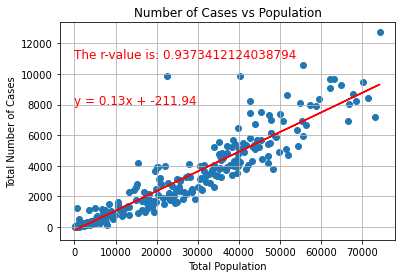

<Figure size 432x288 with 0 Axes>

In [16]:
# Grabbing Number of Cases versus Number of Population
cases = np.array([row["Total Case Count"] for index, row in main_df.iterrows()])
population = np.array([row["Total Population"] for index, row in main_df.iterrows()])
# Graph the scatterplot
plt.scatter(population, cases)
plt.ylabel("Total Number of Cases")
plt.xlabel("Total Population")
plt.title("Number of Cases vs Population")
plt.grid(True)
# Calculating line regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(population, cases)
regress_values = population * slope + intercept
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
# Line plot
plt.plot(population, regress_values, color="red")
plt.annotate(line_eq, (0, 8000), fontsize=12, color="red")
plt.annotate(f"The r-value is: {rvalue}", (0, 11000), fontsize=12, color="red")
# Print r-value and show plot
plt.show()

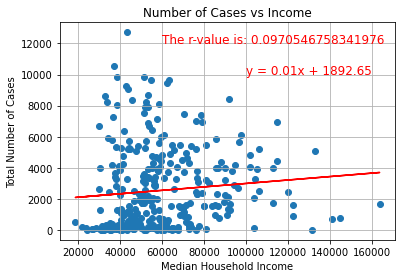

In [9]:
# Grabbing Median Household Income
income = np.array([row["Median Household Income"] for index, row in main_df.iterrows()])
# Graph the scatterplot
plt.scatter(income, cases)
plt.ylabel("Total Number of Cases")
plt.xlabel("Median Household Income")
plt.title("Number of Cases vs Income")
plt.grid(True)
# Calculating line regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(income, cases)
regress_values = income * slope + intercept
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
# Line plot
plt.plot(income, regress_values, color="red")
plt.annotate(line_eq, (100000, 10000), fontsize=12, color="red")
plt.annotate(f"The r-value is: {rvalue}", (60000, 12000), fontsize=12, color="red")
# Print r-value and show plot
plt.show()

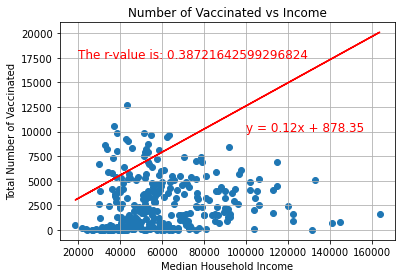

In [10]:
# Grabbing number of vaccination
vaccines = np.array([row["Total Vaccinated"] for index, row in main_df.iterrows()])
# Graph the scatterplot
plt.scatter(income, cases)
plt.ylabel("Total Number of Vaccinated")
plt.xlabel("Median Household Income")
plt.title("Number of Vaccinated vs Income")
plt.grid(True)
# Calculating line regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(income, vaccines)
regress_values = income * slope + intercept
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
# Line plot
plt.plot(income, regress_values, color="red")
plt.annotate(line_eq, (100000, 10000), fontsize=12, color="red")
plt.annotate(f"The r-value is: {rvalue}", (20000, 17500), fontsize=12, color="red")
# Print r-value and show plot
plt.show()

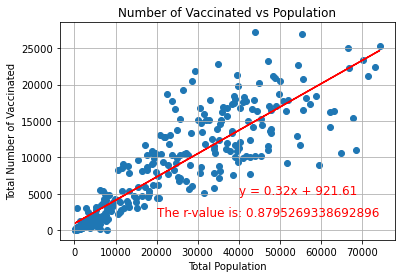

In [13]:
# Graph the scatterplot
plt.scatter(population, vaccines)
plt.ylabel("Total Number of Vaccinated")
plt.xlabel("Total Population")
plt.title("Number of Vaccinated vs Population")
plt.grid(True)
# Calculating line regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(population, vaccines)
regress_values = population * slope + intercept
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
# Line plot
plt.plot(population, regress_values, color="red")
plt.annotate(line_eq, (40000, 5000), fontsize=12, color="red")
plt.annotate(f"The r-value is: {rvalue}", (20000, 2000), fontsize=12, color="red")
# Print r-value and show plot
plt.show()